<a href="https://colab.research.google.com/github/Sumanth-Katnam/IST-526/blob/main/Assignment_3_SumanthKatnam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6. Intro to Python and Pandas Dataframe

##### a. Create a list named people that contains 4 integers (e.g., 10, 20, 30, 34)

In [62]:
people = [10, 20, 30, 40]

##### b. Create a dictionary named node_val that contans 2 keys ('id', 'label') with values 1, and 'Jason', respectively.

In [63]:
node_val = {
    'id' : 1,
    'label' : 'Jason'
}

##### c. Create another dictionary named edge_val that has two keys (source, and target) where source has value 1 and target has value 2

In [64]:
edge_val = {
    'source' : 1,
    'target' : 2
}

##### d. Create a dictionary named baby_graph that contains two dictionaries with keys 'node' and 'edge' and values node_val and edge_val, respectively.

In [65]:
baby_graph = {
    'node' : node_val,
    'edge' : edge_val
}

##### e. Create a list named nodes_vals containing four dictionaries of node_val. You can use random values for each key in individual node_val

##### Similarly, create a list named edge_vals containing four dictionaries of edge_val. Use random values of each key in the individual edge_val dictionary.

##### Finally, create a dictionary named graph containing two dictionaries with keys 'nodes' and 'edges' and values would node_vals and edge_vals, respectively.

In [66]:
node_vals = [
    {
        'id' : 1,
        'label' : 'Jerry'
    }, {
        'id' : 2,
        'label' : 'George'
    }, {
        'id' : 3,
        'label' : 'Elaine'
    }, {
        'id' : 4,
        'label' : 'Kramer'
    },
]

edge_vals = [
    {
        'source' : 1,
        'target' : 2
    }, {
        'source' : 2,
        'target' : 3
    }, {
        'source' : 3,
        'target' : 4
    }, {
        'source' : 4,
        'target' : 1
    }, 
]

graph = {
    'nodes' : node_vals,
    'edges' : edge_vals
}

# 7. Exploratory Data Analysis

### Imports

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

### Loading Data

In [68]:
url = 'https://raw.githubusercontent.com/smbillah/ist526/main/liver_dataset.csv'

# pandas call to read csv file 
df = pd.read_csv(url)

#deleting the unwanted column
del df['dummy_label']

# quickly show the dataframe
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


### Shape and info of the data

In [69]:
print(df.shape)

print(df.info())

(345, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mcv      345 non-null    int64  
 1   alkphos  345 non-null    int64  
 2   sgpt     345 non-null    int64  
 3   sgot     345 non-null    int64  
 4   gammagt  345 non-null    int64  
 5   drinks   345 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 16.3 KB
None


##### We can see that there are 6 variables (excluding the 'dummy_label' column) and 345 entries of our data. Also, all of our data values are integers except for the variable 'drinks' that has decimal values. None of these variables have a null value.

### Mean, Median, Standard Deviation etc.,

In [70]:
df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


##### The mean of all variables except the 'gammagt' is almost equal to the median of the data that is given by 50% row which means the distribution of values in those variables are symmetrical. 
##### Also we see a notable difference between the 75th percentile and the max value of all variables which suggests that there are extreme values in our data set.

### Ditribution/Histogram

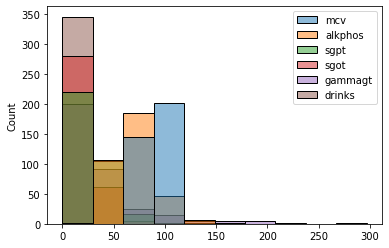

In [71]:
# for all attributes
sns.histplot(df, bins = 10)
plt.show()

##### This plot shows the distribution of values across each variable. We can see that the values of 'drinks' variable are mostly within the range of 0 to 25 which is clear from our prior observation that the mean of this data is 3.455072. Similary, Most values of 'mcv' lies between 85 to 105 (approximately) which is clear from the fact that the mean of this data is 90.159420. Similarly, we can make further observations like this.

### Box Plots

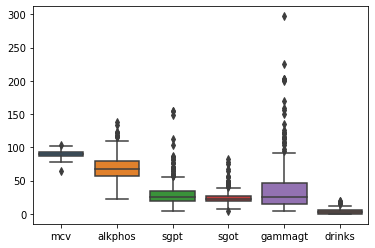

In [72]:
sns.boxplot(data = df)

##### In this plot the segment inside the rectangle shows the median and points above and below the box show the locations of the minimum and maximum. From this, we can see that all of our variables have outliers.

# 8.Principle Component Analysis (PCA)

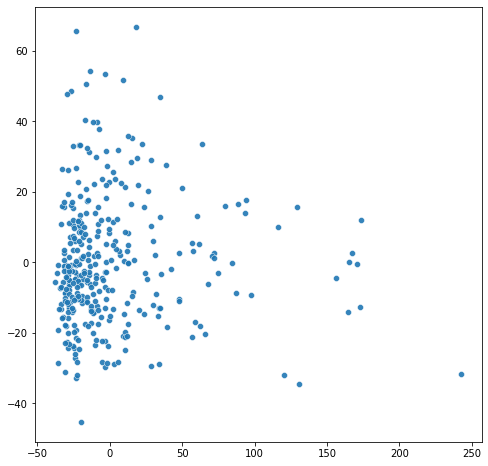

In [73]:
#Importing PCA 
from sklearn.decomposition import PCA

## create PCA model 
# We are using the same data frame from the previous question which has the label column dropped
pca_model = PCA(n_components=2)
reduced_dims = pca_model.fit_transform(df)

# adjust figure's width and height
plt.figure(figsize=(8,8))

## reduced_dims has 2 dimensions (new x, which has index:0; and new y, which has index 1)
sns.scatterplot(x = reduced_dims[:, 0], y = reduced_dims[:, 1], alpha=0.9, palette="deep")

# if one dimensional, use y as 0
# sns.scatterplot(x = reduced_dims[:, 0], y = 0, alpha=0.9, palette="deep")
plt.show()

##### After running the PCA, we see that most of our new data are concentrated around the new origin of the dimensionally reduced axes. Although this data can be considered a cluster, we cannot clusterize the rest of the data as there is no pattern in the way these are spread out.

# 9. Parallel Co-ordinate

In [74]:
#Import from plotly
import plotly.express as px

# This implementation doesn't need a label to differentiate
plot = px.parallel_coordinates(df)
plot.show()

#####  From this plot, we see that there is almost a positive correlation from 'sgpt' and 'sgot'. There doesn't seem to be any other correlations between other columns. Once we interpret the correlation marix we will get further idea.

# 10. Find the correlation matrix using df.corr().

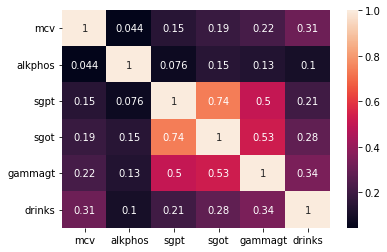

In [75]:
# Used heat map here to better identify the correlation values and the relations
sns.heatmap(df.corr(), annot=True)

In [76]:
#Using the information above, rearranging the order of columns in the parallel coordinates graph.
new_col_order = ['sgpt', 'sgot', 'gammagt', 'drinks', 'mcv', 'alkphos']

# changing the column order
df_new = df[new_col_order]

plot2 = px.parallel_coordinates(df_new)
plot2.show()
